In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
import os
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization
from keras import optimizers

from keras.optimizers import rmsprop, SGD, adamax



Using TensorFlow backend.


In [0]:
import numpy as np
X_train = np.load('/content/drive/My Drive/Training Array /X_train_file.npy')
X_test = np.load('/content/drive/My Drive/Training Array /X_test_file.npy')
y_test = np.load('/content/drive/My Drive/Training Array /y_test_file.npy')
y_train = np.load('/content/drive/My Drive/Training Array /y_train_file.npy')

In [0]:
batch_size = 256
num_classes = 200
epochs = 10


In [0]:
X_train.shape
X_train = X_train.reshape(-1)
X_train = X_train.reshape(100000, 32, 32, 3)
#X_train.shape

X_test.shape
X_test = X_test.reshape(-1)
X_test = X_test.reshape(10000, 32, 32, 3)
#X_test.shape

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train Samples')
print(X_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



100000 train Samples
10000 test Samples


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       147584    
__________

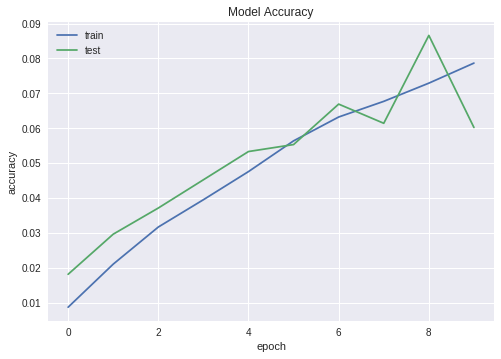

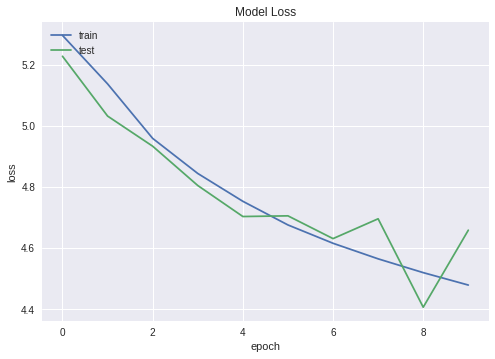

In [0]:

data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model1_Exp1.h5'


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (X_train.shape[1:]), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='softmax'))

opt = optimizers.adam(beta_1=.9,beta_2=.999,lr = 0.00005)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


train_history = model.fit(X_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (X_test, y_test))


  
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


